In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')

NameError: ignored

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


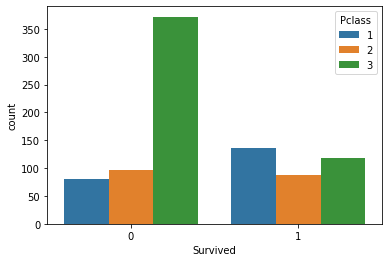

In [ ]:
sns.countplot(x='Survived', data=train_data,hue='Pclass')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


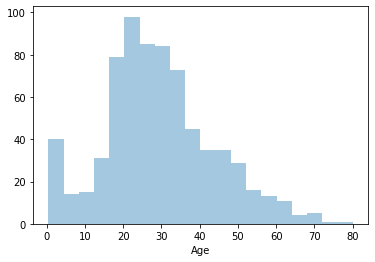

In [ ]:
sns.distplot(train_data['Age'],kde=False)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

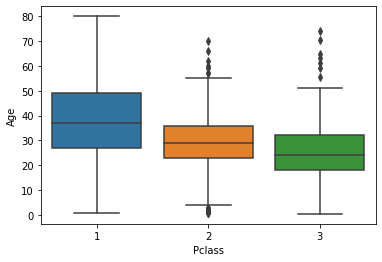

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [ ]:
print(train_data[train_data['Pclass'] == 1]['Age'].mean())
print(train_data[train_data['Pclass'] == 2]['Age'].mean())
print(train_data[train_data['Pclass'] == 3]['Age'].mean())

38.0
30.0
25.0


In [ ]:
def fill_in_na_values(cols):
  age=cols[0]
  pclass=cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return 38
    elif pclass == 2:
      return 30
    elif pclass == 3:
      return 25
    else:
       return age

train_data['Age'] = train_data[['Age','Pclass' ]].apply(fill_in_na_values, axis=1)

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

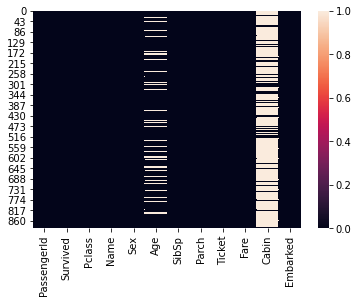

In [ ]:
sns.heatmap(train_data.isnull())

In [ ]:
train_data.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
train_data.head()

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [1]:
train_data['Sex'].unique()
train_data['Embarked'].unique()

NameError: ignored

In [ ]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
sex

In [ ]:
embarked = pd.get_dummies(train_data['Embarked'],drop_first=True)
embarked

In [ ]:
train_data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [ ]:
train_data = pd.concat([train_data,sex,embarked],axis=1)

In [ ]:
train_data.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = train_data.drop('Survived',axis=1)
y= train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
X_train

In [ ]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.96      0.83        54
           1       0.88      0.43      0.58        35

    accuracy                           0.75        89
   macro avg       0.80      0.70      0.70        89
weighted avg       0.79      0.75      0.73        89

[[52  2]
 [20 15]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,1,10,100,1000], 'gamma':[0.1,0.01,0.001,0.0001,0.00001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=True)

grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.72      0.96      0.83        54
           1       0.88      0.43      0.58        35

    accuracy                           0.75        89
   macro avg       0.80      0.70      0.70        89
weighted avg       0.79      0.75      0.73        89

[[52  2]
 [20 15]]


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.6s finished


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
print(classification_report(y_test,lr_predictions))
print(confusion_matrix(y_test,lr_predictions))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        54
           1       0.78      0.60      0.68        35

    accuracy                           0.78        89
   macro avg       0.78      0.74      0.75        89
weighted avg       0.78      0.78      0.77        89

[[48  6]
 [14 21]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(classification_report(y_test,knn_predictions))
print(confusion_matrix(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        54
           1       0.79      0.66      0.72        35

    accuracy                           0.80        89
   macro avg       0.80      0.77      0.78        89
weighted avg       0.80      0.80      0.79        89

[[48  6]
 [12 23]]
